In [1]:
%matplotlib notebook

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month

In [5]:
housing_df2 = housing_df2[housing_df2.PRICE.notnull()]
residential_df = housing_df2.loc[housing_df2["SOURCE"] == "Residential"]

In [6]:
housing_df3 = residential_df[['BATHRM','WARD','BEDRM','HF_BATHRM','YEAR','PRICE']]
housing_df3 = housing_df3[~(housing_df3['YEAR'] < 2007.0)] 
housing_df3 = housing_df3[~(housing_df3['YEAR'] > 2017.0)]

In [7]:
ward_4_two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_two_bed_one_bath_df = ward_4_two_bed_one_bath[ward_4_two_bed_one_bath['BEDRM'] == 2]
ward_4_two_bed_one_bath_df2 = ward_4_two_bed_one_bath_df[ward_4_two_bed_one_bath_df['BATHRM'] == 1]
ward_4_two_bed_one_bath_df3 = ward_4_two_bed_one_bath_df2[ward_4_two_bed_one_bath_df2['HF_BATHRM'] == 0]
ward_4_two_bed_one_bath_avg = pd.DataFrame(ward_4_two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_two_bed_one_bath_avg = ward_4_two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

ward_4_two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_two_bed_two_bath_df = ward_4_two_bed_two_bath[ward_4_two_bed_two_bath['BEDRM'] == 2]
ward_4_two_bed_two_bath_df2 = ward_4_two_bed_two_bath_df[ward_4_two_bed_two_bath_df['BATHRM'] == 2]
ward_4_two_bed_two_bath_df3 = ward_4_two_bed_two_bath_df2[ward_4_two_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_4_two_bed_two_bath_avg = pd.DataFrame(ward_4_two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_two_bed_two_bath_avg = ward_4_two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

ward_4_three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_three_bed_two_bath_df = ward_4_three_bed_two_bath[ward_4_three_bed_two_bath['BEDRM'] == 3]
ward_4_three_bed_two_bath_df2 = ward_4_three_bed_two_bath_df[ward_4_three_bed_two_bath_df['BATHRM'] == 2]
ward_4_three_bed_two_bath_df3 = ward_4_three_bed_two_bath_df2[ward_4_three_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_4_three_bed_two_bath_avg = pd.DataFrame(ward_4_three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_three_bed_two_bath_avg = ward_4_three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

ward_4_four_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_four_bed_two_bath_df = ward_4_four_bed_two_bath[ward_4_four_bed_two_bath['BEDRM'] == 4]
ward_4_four_bed_two_bath_df2 = ward_4_four_bed_two_bath_df[ward_4_four_bed_two_bath_df['BATHRM'] == 2]
ward_4_four_bed_two_bath_df3 = ward_4_four_bed_two_bath_df2[ward_4_four_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_4_four_bed_two_bath_avg = pd.DataFrame(ward_4_four_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_four_bed_two_bath_avg = ward_4_four_bed_two_bath_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})

ward_4_four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_four_bed_three_bath_df = ward_4_four_bed_three_bath[ward_4_four_bed_three_bath['BEDRM'] == 4]
ward_4_four_bed_three_bath_df2 = ward_4_four_bed_three_bath_df[ward_4_four_bed_three_bath_df['BATHRM'] == 3]
ward_4_four_bed_three_bath_df3 = ward_4_four_bed_three_bath_df2[ward_4_four_bed_three_bath_df2['HF_BATHRM'] == 0]
ward_4_four_bed_three_bath_avg = pd.DataFrame(ward_4_four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_four_bed_three_bath_avg = ward_4_four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})

bed_bath_ward4_merge1 = ward_4_two_bed_one_bath_avg.join(ward_4_two_bed_two_bath_avg,how='left')
bed_bath_ward4_merge2 = bed_bath_ward4_merge1.join(ward_4_three_bed_two_bath_avg,how='left')
bed_bath_ward4_merge3 = bed_bath_ward4_merge2.join(ward_4_four_bed_two_bath_avg,how='left')
bed_bath_ward4_merge4 = bed_bath_ward4_merge3.join(ward_4_four_bed_three_bath_avg,how='left')

bed_bath_ward4_merge4

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,4Bd 2Ba Price,4Bd 3Ba Price
YEAR,,,,,
2007.0,277272.000000,427000.000000,444675.925000,441323.529412,717666.666667
2008.0,302000.000000,320181.666667,407528.965517,455937.500000,624555.555556
2009.0,256337.500000,283925.000000,322678.826087,330499.944444,582121.777778
2010.0,230633.333333,395000.000000,364270.731707,444832.142857,566389.473684
2011.0,229966.666667,392000.000000,374306.944444,410768.750000,598171.428571
2012.0,217125.000000,270225.000000,417420.142857,502590.000000,605114.190476
2013.0,364083.333333,341400.000000,484679.021739,514462.125000,765082.352941
2014.0,332585.666667,448112.375000,524841.280000,540281.818182,676251.724138
2015.0,378714.142857,399020.000000,493460.816327,580100.000000,694773.750000


In [9]:
change_2017 = bed_bath_ward4_merge4.loc[2017.0,:]
change_2007 = bed_bath_ward4_merge4.loc[2007.0,:]

change = (change_2017 - change_2007)

total_change = (change/change_2007)*100
print(total_change)

2Bd 1Ba Price    79.906121
2Bd 2Ba Price    -3.582699
3Bd 2Ba Price    28.903127
4Bd 2Ba Price    28.729223
4Bd 3Ba Price    14.884546
dtype: float64


<IPython.core.display.Javascript object>


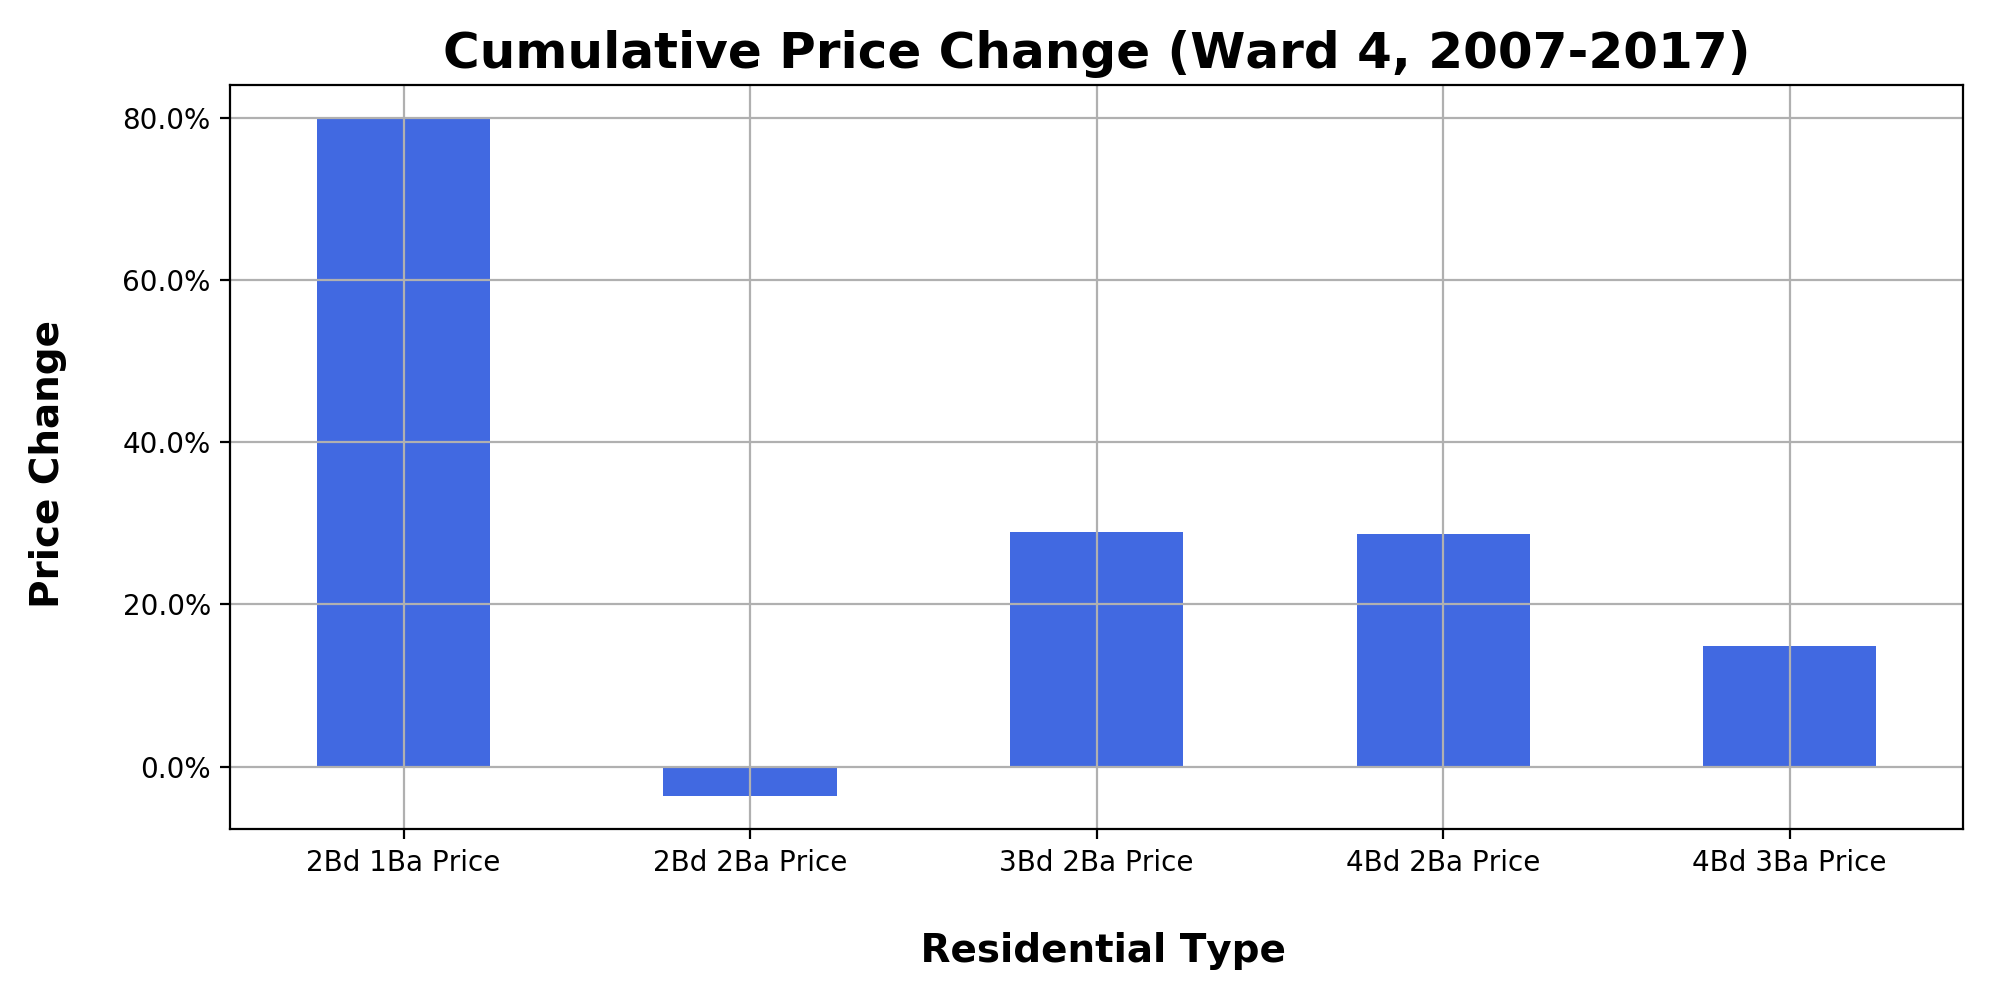

In [10]:
total_change_df = pd.DataFrame(total_change)

total_change_df.plot(kind='bar', figsize=(10,5), color='royalblue', legend=False)

plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.title("Cumulative Price Change (Ward 4, 2007-2017)", fontsize=18, fontweight='bold')
plt.ylabel("Price Change \n", fontsize=14, fontweight='bold')
plt.xlabel("\n Residential Type", fontsize=14, fontweight='bold', rotation='horizontal')
plt.xticks(rotation='horizontal')
plt.grid()
plt.tight_layout()

plt.show()
plt.savefig("NewImages/ward_4_pct_change.png")